In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets
import scipy.stats as stats

In [12]:
df = pd.read_csv("BostonHousing.csv")
y = df["medv"].values
X = df.drop(columns=["medv"]).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
clf = SVR()
scores = cross_val_score(clf, X, y, cv=3,scoring='neg_mean_squared_error')
print("MSE:"+ str(-scores.mean()))

MSE:77.42951812579331


In [17]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
results = []
rf_params = {
    'C': stats.uniform(0,50),
    "kernel":['poly','rbf','sigmoid'],
    "epsilon":stats.uniform(0,1)
}
n_iter_search=20
clf = SVR(gamma='scale')
for i in range(100):
  Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='neg_mean_squared_error')
  Random.fit(X, y)
  print(Random.best_params_)
  y_pred = Random.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  params = Random.best_params_
  result = {'Iteration': i+1, 'Accuracy': r2, 'C': params['C'], 'Kernel': params['kernel']}
  results.append(result)

{'C': 28.12844439409722, 'epsilon': 0.5032161960333722, 'kernel': 'poly'}
{'C': 27.472928054546397, 'epsilon': 0.3456522939104507, 'kernel': 'poly'}
{'C': 42.80308345586712, 'epsilon': 0.06726939612891836, 'kernel': 'poly'}
{'C': 43.69553958714763, 'epsilon': 0.2136745760282508, 'kernel': 'poly'}
{'C': 24.93948259723517, 'epsilon': 0.41454211044574973, 'kernel': 'poly'}
{'C': 25.41434112667539, 'epsilon': 0.3699583336427279, 'kernel': 'poly'}
{'C': 39.638294257792786, 'epsilon': 0.7604777374233485, 'kernel': 'poly'}
{'C': 40.394401438911416, 'epsilon': 0.08427858755271389, 'kernel': 'poly'}
{'C': 35.964936805111094, 'epsilon': 0.15376985975493107, 'kernel': 'poly'}
{'C': 40.44769195425283, 'epsilon': 0.04557445439649954, 'kernel': 'poly'}
{'C': 32.07112406398706, 'epsilon': 0.12016713007011293, 'kernel': 'poly'}
{'C': 48.363470728697386, 'epsilon': 0.18372284789570303, 'kernel': 'poly'}
{'C': 47.89713385082771, 'epsilon': 0.08693580542211721, 'kernel': 'poly'}
{'C': 24.09257885960821, 

In [18]:
results_df = pd.DataFrame(results)
results_df.to_csv('svm_results.csv', index=False)

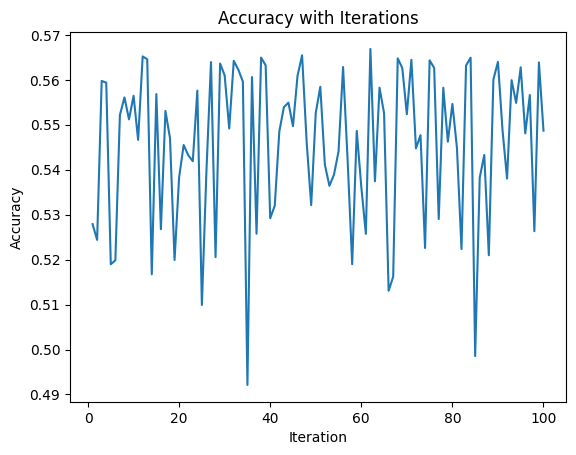

In [19]:
import matplotlib.pyplot as plt
plt.plot(results_df['Iteration'], results_df['Accuracy'])
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy with Iterations')
plt.show()